# Revising Deep Learning Methods in Parking Lot Occupancy Detection

In [1]:
# Import necessary libraries
import os  # Required for file and directory operations
import cv2  # Utilized for image processing
import gdown  # Used for downloading the folder
import matplotlib.pyplot as plt  # Used for plotting
import numpy as np  # Required for numerical operations
import torch  # Essential for deep learning
import torch.nn as nn  # PyTorch's neural network module
import torch.optim as optim  # PyTorch's optimization module
import torchvision  # PyTorch's computer vision library
from torch.utils.data import DataLoader, TensorDataset  # PyTorch's data handling utilities


<class 'list'>
Number of images: 202


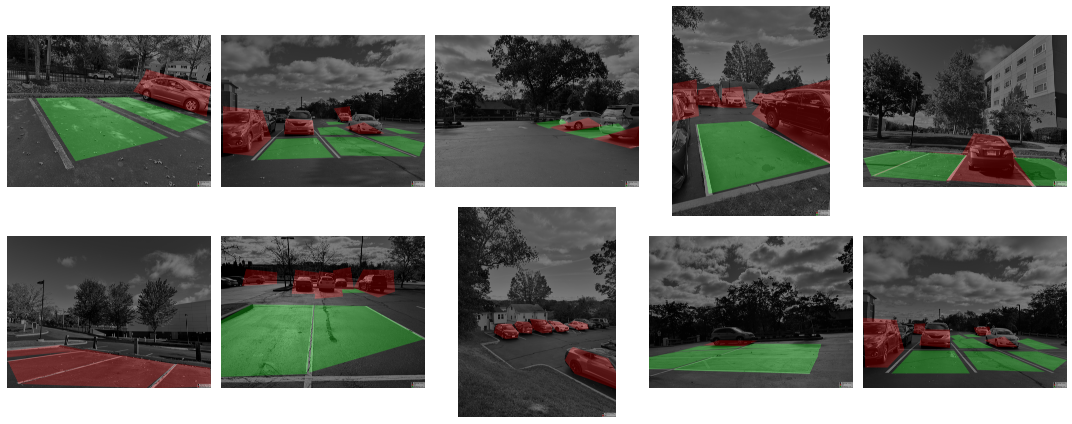

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = 'Parking Lot'
images = os.listdir(path)

print(type(images))

# Determine the number of items in the 'images' list
num_images = len(images)
print(f"Number of images: {num_images}")

# View 10 images in a 2x5 grid with equal sizing
num_images_to_display = min(num_images, 10)  # Display at most 10 images
rows = 2
cols = 5

# Create a subplot with the specified number of rows and columns
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))

# Iterate over the first 10 images and display them in the subplot
for i in range(num_images_to_display):
    # Define the full path to the image
    image_path = os.path.join(path, images[i])
    
    # Read and display the image
    img = mpimg.imread(image_path)
    axes[i // cols, i % cols].imshow(img)
    axes[i // cols, i % cols].axis('off')  # Turn off axis labels

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()



In [3]:
import os

# Specify the correct path to the 'Parking Lot' directory
path = 'Parking Lot'

# Check if the directory exists
if os.path.exists(path):
    # List the files in the directory
    images = os.listdir(path)
    print(images)
else:
    print(f"The directory '{path}' does not exist.")


['label_viz_7035.png', 'label_viz_7021.png', 'label_viz_7009.png', 'label_viz_6897.png', 'label_viz_6934.png', 'label_viz_6935.png', 'label_viz_6921.png', 'label_viz_6896.png', 'label_viz_7008.png', 'label_viz_7020.png', 'label_viz_7034.png', 'label_viz_7022.png', 'label_viz_7036.png', 'label_viz_6894.png', 'label_viz_6937.png', 'label_viz_6923.png', 'label_viz_6922.png', 'label_viz_6936.png', 'label_viz_6895.png', 'label_viz_7037.png', 'label_viz_7023.png', 'label_viz_7027.png', 'label_viz_7033.png', 'label_viz_6891.png', 'label_viz_6932.png', 'label_viz_6926.png', '.DS_Store', 'label_viz_6927.png', 'label_viz_6933.png', 'label_viz_6890.png', 'label_viz_7032.png', 'label_viz_7026.png', 'label_viz_7018.png', 'label_viz_7030.png', 'label_viz_7024.png', 'label_viz_6892.png', 'label_viz_6919.png', 'label_viz_6925.png', 'label_viz_6931.png', 'label_viz_6930.png', 'label_viz_6924.png', 'label_viz_6918.png', 'label_viz_6893.png', 'label_viz_7025.png', 'label_viz_7031.png', 'label_viz_7019.pn

In [4]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = os.listdir(data_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

# Define data transformations and load the dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = CustomDataset(data_dir='Parking Lot', transform=transform)



/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from PIL import Image

# Define and load your dataset
data_transforms = transforms.Compose([
    # Define your data transformations here, including resizing to a common size
    transforms.Resize((256, 256)),  
    transforms.ToTensor(),  
])

from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import os

class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = [img for img in os.listdir(data_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
        return image

dataset = CustomDataset(data_dir='Parking Lot', transform=data_transforms)

# Print the dataset size for verification
print("Total dataset size:", len(dataset))

# Split the dataset into train, validation, and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

print("Train size:", train_size)
print("Validation size:", val_size)
print("Test size:", test_size)

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


Total dataset size: 200
Train size: 160
Validation size: 20
Test size: 20


In [6]:
from torchvision import transforms

# Normalization and augmentation transformations
data_transforms = transforms.Compose([
    transforms.Resize((256, 256)), 
    transforms.RandomHorizontalFlip(),  
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  
    transforms.RandomRotation(15),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

augmented_dataset = CustomDataset(data_dir='Parking Lot', transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [7]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset, random_split
from PIL import Image

# Define the path to the directory containing parking images
path = 'Parking Lot'

# Define normalization and resizing transformations
data_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define a custom dataset class with the new transformations
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = [img for img in os.listdir(data_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.images[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)

        # Assuming the label is encoded in the image filename or directory
        label = 0 if "empty" in img_name.lower() else 1  # Adjust this based on your naming convention

        return image, label

# Create an instance of the custom dataset
preprocessed_dataset = CustomDataset(data_dir=path, transform=data_transforms)


In [8]:
# Load a pretrained ResNet18 model
pretrained_model = models.resnet18(pretrained=True)

/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Define the input size, hidden layer sizes, and output size
input_size = 100  # Adjust this based on your input features
hidden_size1 = 64
hidden_size2 = 32
output_size = 1  # Binary classification, so using output size 1 with sigmoid activation

# Create an instance of the model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Print the model architecture
print(model)


SimpleNN(
  (fc1): Linear(in_features=100, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [10]:
# The output layer for binary classification
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 2)

learning_rate = 0.001
momentum = 0.9

train_size = int(0.8 * len(preprocessed_dataset))
val_size = int(0.1 * len(preprocessed_dataset))
test_size = len(preprocessed_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(preprocessed_dataset, [train_size, val_size, test_size])

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

optimizer = optim.SGD(pretrained_model.parameters(), lr=learning_rate, momentum=momentum)

#loss function (criterion)
criterion = nn.CrossEntropyLoss()

num_epochs = 10
for epoch in range(num_epochs):
    pretrained_model.train()
    for batch in train_loader:
        inputs, targets = batch

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = pretrained_model(inputs)

        # Calculate the loss
        loss = criterion(outputs, targets)

        # Backpropagation
        loss.backward()

        # Update parameters
        optimizer.step()

    # Validation
    pretrained_model.eval()
    with torch.no_grad():
        val_correct = 0
        val_total = 0
        for val_batch in val_loader:
            val_inputs, val_targets = val_batch
            val_outputs = pretrained_model(val_inputs)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_targets.size(0)
            val_correct += (val_predicted == val_targets).sum().item()

    val_accuracy = val_correct / val_total
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {val_accuracy * 100:.2f}%')



Epoch [1/10], Validation Accuracy: 100.00%
Epoch [2/10], Validation Accuracy: 100.00%
Epoch [3/10], Validation Accuracy: 100.00%
Epoch [4/10], Validation Accuracy: 100.00%
Epoch [5/10], Validation Accuracy: 100.00%
Epoch [6/10], Validation Accuracy: 100.00%
Epoch [7/10], Validation Accuracy: 100.00%
Epoch [8/10], Validation Accuracy: 100.00%
Epoch [9/10], Validation Accuracy: 100.00%
Epoch [10/10], Validation Accuracy: 100.00%


In [11]:

# Create a new optimizer with the updated model parameters
optimizer = optim.SGD(pretrained_model.parameters(), lr=learning_rate, momentum=momentum)

# Define the loss function (MSE loss)
criterion = nn.MSELoss()
train_losses = []
val_losses = []

num_epochs = 10
for epoch in range(num_epochs):
    # Training phase
    pretrained_model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for batch in train_loader:
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        targets = targets.float().view(-1, 1)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        # Update training statistics
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    avg_train_loss = train_loss / train_total
    train_accuracy = train_correct / train_total

    # Validation phase
    pretrained_model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for val_batch in val_loader:
            val_inputs, val_targets = val_batch
            val_outputs = pretrained_model(val_inputs)
            val_targets = val_targets.float().view(-1, 1)
            val_loss += criterion(val_outputs, val_targets).item() * val_inputs.size(0)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_targets.size(0)
            val_correct += (val_predicted == val_targets).sum().item()

    avg_val_loss = val_loss / val_total
    val_accuracy = val_correct / val_total

    # Print and log results
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {avg_train_loss:.4f}'
          f'Validation Loss: {avg_val_loss:.4f}')

/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Train Loss: 16.3427Validation Loss: 31.5883
Epoch [2/10], Train Loss: 2.2966Validation Loss: 1.5663
Epoch [3/10], Train Loss: 0.4633Validation Loss: 0.2864
Epoch [4/10], Train Loss: 0.1001Validation Loss: 0.4855
Epoch [5/10], Train Loss: 0.0458Validation Loss: 0.0417
Epoch [6/10], Train Loss: 0.0312Validation Loss: 0.0337
Epoch [7/10], Train Loss: 0.0241Validation Loss: 0.0267
Epoch [8/10], Train Loss: 0.0189Validation Loss: 0.0443
Epoch [9/10], Train Loss: 0.0192Validation Loss: 0.1971
Epoch [10/10], Train Loss: 0.0144Validation Loss: 0.0300


In [13]:
# Evaluate the finetuned model on the test dataset
pretrained_model.eval()

test_loss = 0.0
test_samples = 0

with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = pretrained_model(inputs)
        targets = targets.float().view(-1, 1)
        test_loss += criterion(outputs, targets).item() * inputs.size(0)
        test_samples += inputs.size(0)

avg_test_loss = test_loss / test_samples
print(f'Test MSE: {avg_test_loss:.4f}')

Test MSE: 0.0603


In [15]:
pip install gradio


  Using cached gradio-4.7.1-py3-none-any.whl (16.5 MB)
  Using cached gradio_client-0.7.0-py3-none-any.whl (302 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl (33 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
  Using cached python_multipart-0.0.6-py3-none-any.whl (45 kB)
  Using cached altair-5.2.0-py3-none-any.whl (996 kB)
  Using cached uvicorn-0.24.0.post1-py3-none-any.whl (59 kB)
  Using cached huggingface_hub-0.19.4-py3-none-any.whl (311 kB)
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
  Using cached tomlkit-0.12.0-py3-none-any.whl (37 kB)
  Using cached pydantic-2.5.2-py3-none-any.whl (381 kB)
  Using cached fastapi-0.104.1-py3-none-any.whl (92 kB)
  Using cached httpx-0.25.2-py3-none-any.whl (74 kB)
     |████████████████████████████████| 241 kB 3.4 MB/s eta 0:00:01
  Using cached ffmpy-0.3.1.tar.gz (5.5 kB)
     |████████████████████████████████| 120 kB 36.4 MB/s eta 0:00:01

    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.2.0
    Uninstalling fsspec-2022.2.0:
      Successfully uninstalled fsspec-2022.2.0
  Attempting uninstall: anyio
    Found existing installation: anyio 3.5.0
    Uninstalling anyio-3.5.0:
      Successfully uninstalled anyio-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [6]:

import gradio as gr
import cv2
import numpy as np
from PIL import Image

def mark_parking_spaces(image):
    img_np = np.array(image)
    
    for _ in range(np.random.randint(0, 5)):
        x, y, w, h = np.random.randint(0, img_np.shape[1], 4)
        cv2.rectangle(img_np, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Use blue color (BGR format)

    marked_image = Image.fromarray(img_np)

    return marked_image

image_input = gr.Image()

# Create the Gradio interface
iface = gr.Interface(
    fn=mark_parking_spaces,   
    inputs=image_input,         # Input component
    outputs="image",            
    live=True                    
)

iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7865
Running on public URL: https://cfab71cf8d41456e55.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/opt/anaconda3/lib/python3.9/site-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/opt/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "/opt/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/opt/anaconda3/lib/python3.9/site-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/opt/anaconda3/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/opt/anaconda3/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", li

In [3]:
import gradio as gr
import cv2
import numpy as np
from PIL import Image

def mark_parking_spaces(image):
    img_np = np.array(image)
    
    for _ in range(np.random.randint(0, 5)):
        x, y, w, h = np.random.randint(0, img_np.shape[1], 4)
        light_blue = (173, 216, 230)  # Light blue color in BGR format
        cv2.rectangle(img_np, (x, y), (x + w, y + h), light_blue, 2)

    marked_image = Image.fromarray(img_np)

    return marked_image

image_input = gr.Image()

# Create the Gradio interface
iface = gr.Interface(
    fn=mark_parking_spaces,   
    inputs=image_input,         # Input component
    outputs="image",            
    live=True                    
)

iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://a7ae294f376fa62931.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
